<a href="https://colab.research.google.com/github/wAreRza/labs/blob/main/5%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [ ]:
y = df['WT_50']
X = df.drop('WT_50', axis=1) # переменные для проверки влияния

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   CHOL_50    200 non-null    int64
 6   SES        200 non-null    int64
 7   CL_STATUS  200 non-null    int64
 8   MD_62      200 non-null    int64
 9   SBP_62     200 non-null    int64
 10  DBP_62     200 non-null    int64
 11  CHOL_62    200 non-null    int64
 12  WT_62      200 non-null    int64
 13  IHD_DX     200 non-null    int64
 14  DEATH      200 non-null    int64
dtypes: int64(15)
memory usage: 23.6 KB


In [ ]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

AGE_50: 45 уникальных значений
MD_50: 4 уникальных значений
SBP_50: 38 уникальных значений
DBP_50: 31 уникальных значений
HT_50: 15 уникальных значений
WT_50: 92 уникальных значений
CHOL_50: 94 уникальных значений
SES: 5 уникальных значений
CL_STATUS: 7 уникальных значений
MD_62: 5 уникальных значений
SBP_62: 55 уникальных значений
DBP_62: 32 уникальных значений
CHOL_62: 123 уникальных значений
WT_62: 92 уникальных значений
IHD_DX: 10 уникальных значений
DEATH: 2 уникальных значений


In [ ]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,157,0,0


In [ ]:
df_corr_test = X.copy()

df_corr_test['y'] = y
df_corr_test

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,y
0,42,1,110,65,64,291,2,8,4,120,78,271,146,2,1,147
1,53,1,130,72,69,278,1,6,2,122,68,250,165,9,1,167
2,53,2,120,90,70,342,4,8,1,132,90,304,223,2,1,222
3,48,4,120,80,72,239,4,8,2,118,68,209,227,3,1,229
4,53,3,118,74,66,243,3,8,5,118,56,261,138,2,1,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,152,0,0,148
196,23,1,110,70,69,120,3,8,2,112,76,198,153,0,0,137
197,20,3,130,80,66,210,5,0,1,130,85,274,158,0,0,150
198,46,3,140,84,66,130,4,6,2,148,88,160,157,0,0,138


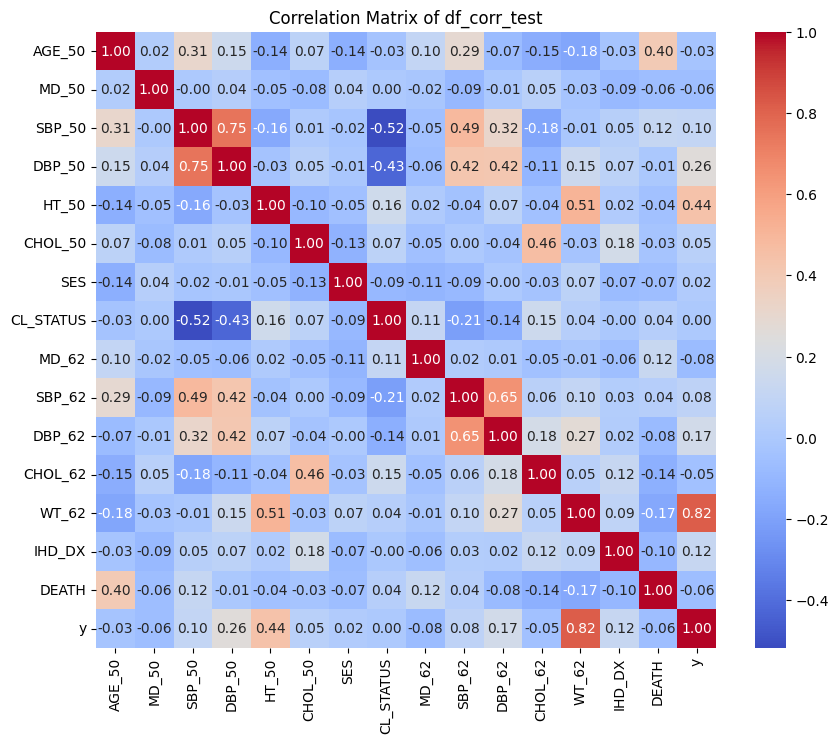

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):

    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [ ]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 10.67
Mean Squared Error (MSE): 189.36
R^2 Score: 0.76


In [ ]:
resolve_regression(X[['HT_50', 'WT_62']], y)
None

Regularization: None
Mean Absolute Error (MAE): 11.86
Mean Squared Error (MSE): 221.24
R^2 Score: 0.71


In [ ]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,157,0,0


In [ ]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [ ]:
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=10)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=10)

In [ ]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 11.33
Mean Squared Error (MSE): 198.34
R^2 Score: 0.74


In [ ]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 10.79
Mean Squared Error (MSE): 187.63
R^2 Score: 0.76


Выбираем отбор признаков на основе отобранных признаков.

Regularization: None
Mean Absolute Error (MAE): 10.79
Mean Squared Error (MSE): 187.63
R^2 Score: 0.76


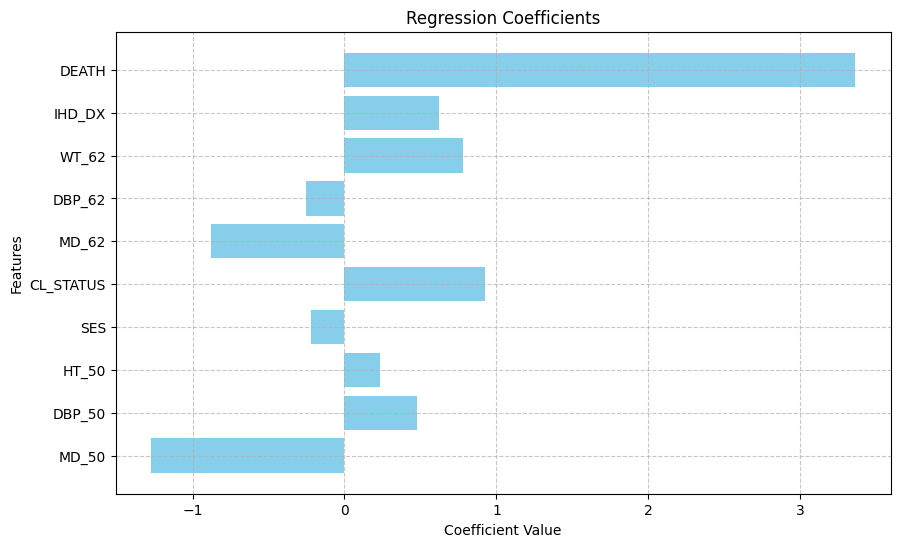

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [ ]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

<ipython-input-134-6acce150e7f5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [ ]:
X_selected_rfe

,MD_50,DBP_50,HT_50,SES,CL_STATUS,MD_62,DBP_62,WT_62,IHD_DX,DEATH
0,0.000000,0.264706,0.214286,0.25,1.00,0.75,0.318841,0.275362,0.222222,1.0
1,0.000000,0.333333,0.571429,0.00,0.75,0.25,0.173913,0.413043,1.000000,1.0
2,0.333333,0.509804,0.642857,0.75,1.00,0.00,0.492754,0.833333,0.222222,1.0
3,1.000000,0.411765,0.785714,0.75,1.00,0.25,0.173913,0.862319,0.333333,1.0
4,0.666667,0.352941,0.357143,0.50,1.00,1.00,0.000000,0.217391,0.222222,1.0
...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.411765,0.357143,0.25,1.00,0.00,0.130435,0.318841,0.000000,0.0
196,0.000000,0.313725,0.571429,0.50,1.00,0.25,0.289855,0.326087,0.000000,0.0
197,0.666667,0.411765,0.357143,1.00,0.00,0.00,0.420290,0.362319,0.000000,0.0
198,0.666667,0.450980,0.357143,0.75,0.75,0.25,0.463768,0.355072,0.000000,0.0


Regularization: None
Mean Absolute Error (MAE): 10.79
Mean Squared Error (MSE): 187.63
R^2 Score: 0.76


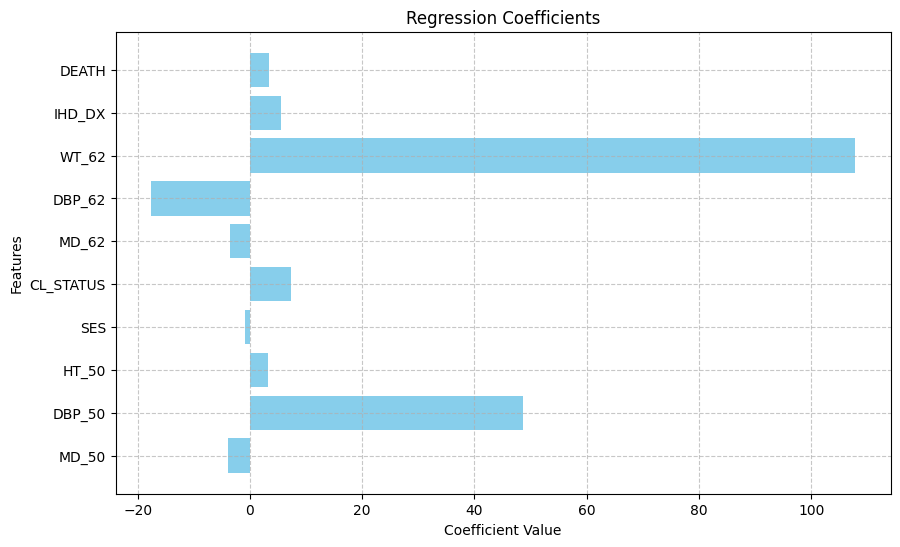

In [ ]:
# Выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 10.79
Mean Squared Error (MSE): 187.63
R^2 Score: 0.76


In [ ]:
resolve_regression(X, y, regularization='l1')
None

Regularization: l1
Mean Absolute Error (MAE): 10.71
Mean Squared Error (MSE): 195.68
R^2 Score: 0.75


In [ ]:
resolve_regression(X, y, regularization='l2')
None

Regularization: l2
Mean Absolute Error (MAE): 10.68
Mean Squared Error (MSE): 189.42
R^2 Score: 0.76


In [ ]:
resolve_regression(X, y, regularization='l3')
None

Regularization: l3
Mean Absolute Error (MAE): 10.67
Mean Squared Error (MSE): 189.36
R^2 Score: 0.76


In [ ]:
def regression_validation(X, y, regularization=None):

    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()
    elif regularization == 'l2':
        model = Ridge()
    else:
        model = LinearRegression()  # Без регуляризации

    # Обучение модели
    model.fit(X_train_train, y_train_train)

    # Предсказание
    y_pred = model.predict(X_test)

    y_valid_pred = model.predict(X_validation)

    # Вычисление метрик качества
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    validation_mae = mean_absolute_error(y_validation, y_valid_pred)
    validation_mse = mean_squared_error(y_validation, y_valid_pred)
    validation_r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error Test (MAE): {test_mae:.2f}")
    print(f"Mean Squared Error Test (MSE): {test_mse:.2f}")
    print(f"R^2 Score Test: {test_r2:.2f}")
    print('')
    print(f"Mean Absolute Error Validation (MAE): {validation_mae:.2f}")
    print(f"Mean Squared Error Validation (MSE): {validation_mse:.2f}")
    print(f"R^2 Score Validation: {validation_r2:.2f}")

In [ ]:
regression_validation(X, y)
None

Regularization: None
Mean Absolute Error Test (MAE): 13.51
Mean Squared Error Test (MSE): 290.04
R^2 Score Test: 0.55

Mean Absolute Error Validation (MAE): 11.34
Mean Squared Error Validation (MSE): 207.14
R^2 Score Validation: 0.73


In [ ]:
regression_validation(X_selected_rfe, y_selected_rfe)
None # разница небольшая, если использовать обработанную выборку, однако она есть

Regularization: None
Mean Absolute Error Test (MAE): 13.69
Mean Squared Error Test (MSE): 292.01
R^2 Score Test: 0.55

Mean Absolute Error Validation (MAE): 10.83
Mean Squared Error Validation (MSE): 191.55
R^2 Score Validation: 0.75


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def regression_kneighbours(X, y, n_neighbors=None):

    # Разделение данных на тренировочные и тестовые
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Инициализация модели
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train_train, y_train_train)

    # Предсказание
    y_pred = model.predict(X_test)
    y_valid_pred = model.predict(X_validation)

    # Метрики
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    validation_mae = mean_absolute_error(y_validation, y_valid_pred)
    validation_mse = mean_squared_error(y_validation, y_valid_pred)
    validation_r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print("Model: KNeighborsRegressor")
    print(f"n_neighbors: {n_neighbors}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Test R^2: {test_r2:.2f}")
    print(f"Validation MAE: {validation_mae:.2f}")
    print(f"Validation MSE: {validation_mse:.2f}")
    print(f"Validation R^2: {validation_r2:.2f}")

In [ ]:
regression_kneighbours(X, y, n_neighbors=7)

Model: KNeighborsRegressor
n_neighbors: 7
Test MAE: 16.07
Test MSE: 441.95
Test R^2: 0.32
Validation MAE: 17.08
Validation MSE: 444.11
Validation R^2: 0.43


**Модель KNeighborsRegressor** при предсказывании значений работает хуже, чем линейная регрессия. R^2 больше почти вдвое в валидационной выборке. А квадрат ошибки в 2,25 раз больше, чем в линейной регрессии.

In [ ]:
regression_kneighbours(X_selected_rfe, y_selected_rfe, n_neighbors=7)

Model: KNeighborsRegressor
n_neighbors: 7
Test MAE: 18.58
Test MSE: 677.74
Test R^2: -0.05
Validation MAE: 18.81
Validation MSE: 487.73
Validation R^2: 0.37


In [ ]:
from sklearn.tree import DecisionTreeRegressor

def regression_tree(X, y, max_depth=None):

    # Разделение данных на тренировочные и тестовые
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Инициализация модели
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train_train, y_train_train)

    # Предсказание
    y_pred = model.predict(X_test)
    y_valid_pred = model.predict(X_validation)

    # Метрики
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    validation_mae = mean_absolute_error(y_validation, y_valid_pred)
    validation_mse = mean_squared_error(y_validation, y_valid_pred)
    validation_r2 = r2_score(y_validation, y_valid_pred)

    # Вывод результатов
    print("Model: DecisionTreeRegressor")
    print(f"max_depth: {max_depth}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Test R^2: {test_r2:.2f}")
    print(f"Validation MAE: {validation_mae:.2f}")
    print(f"Validation MSE: {validation_mse:.2f}")
    print(f"Validation R^2: {validation_r2:.2f}")

In [ ]:
regression_tree(X, y, max_depth=5)

Model: DecisionTreeRegressor
max_depth: 5
Test MAE: 17.42
Test MSE: 475.67
Test R^2: 0.27
Validation MAE: 15.56
Validation MSE: 398.49
Validation R^2: 0.49


**Модель DecisionTreeRegressor** и с обработанной, и с изначальной выборкой работет лучше, чем метод ближайших соседей, однако все равно хуже, чем линейная регрессия.

In [ ]:
regression_tree(X_selected_rfe, y_selected_rfe, max_depth=5)

Model: DecisionTreeRegressor
max_depth: 5
Test MAE: 16.28
Test MSE: 440.37
Test R^2: 0.32
Validation MAE: 15.14
Validation MSE: 386.81
Validation R^2: 0.50
